# Effect of the external inhibitor

Figure 4b in the revised version

Addition of external inhibitors $\gamma_I$   


In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

from algae_population import *

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
gammas = np.linspace(0,0.1,5)

data = []

for gammai in gammas:
        
    solutions = []
    for s in scenarios.items():
        ages = s[1]
        a = np.zeros((n_days))
        for ag in ages:
            a[ag[0]] = ag[1]

        print(s)

        # initial inhibitor
        I = 0.0

        # this our vector of state variables: all a_i, i= 0...N-1
        # and I 
        # so it's N + 1 equations
        y = np.hstack((a,I))

        # this means that we stop the ODE when sporulation crosses zero from above
        sporulation.terminal = True
        sporulation.direction = -1

        # methods = ['RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA']
        method = 'RK45'

        sol = solve_ivp(evolution, [t0, tend], y, args=(K, lamda, xi, gammai, theta, mu, dilution, tau, sigma), 
                        method=method, dense_output=True, events=sporulation)
        sol['s']=s

        solutions.append(sol) 
        
    data.append(solutions)

('100/0', [(0, 0.2)])
('90/10', [(0, 0.18000000000000002), (120, 0.020000000000000004)])
('80/20', [(0, 0.16000000000000003), (120, 0.04000000000000001)])
('70/30', [(0, 0.13999999999999999), (120, 0.06)])
('60/40', [(0, 0.12), (120, 0.08000000000000002)])
('50/50', [(0, 0.1), (120, 0.1)])
('40/60', [(0, 0.08000000000000002), (120, 0.12)])
('30/70', [(0, 0.06), (120, 0.13999999999999999)])
('20/80', [(0, 0.04000000000000001), (120, 0.16000000000000003)])
('10/90', [(0, 0.020000000000000004), (120, 0.18000000000000002)])
('0/100', [(120, 0.2)])
('100/0', [(0, 0.2)])
('90/10', [(0, 0.18000000000000002), (120, 0.020000000000000004)])
('80/20', [(0, 0.16000000000000003), (120, 0.04000000000000001)])
('70/30', [(0, 0.13999999999999999), (120, 0.06)])
('60/40', [(0, 0.12), (120, 0.08000000000000002)])
('50/50', [(0, 0.1), (120, 0.1)])
('40/60', [(0, 0.08000000000000002), (120, 0.12)])
('30/70', [(0, 0.06), (120, 0.13999999999999999)])
('20/80', [(0, 0.04000000000000001), (120, 0.160000000000

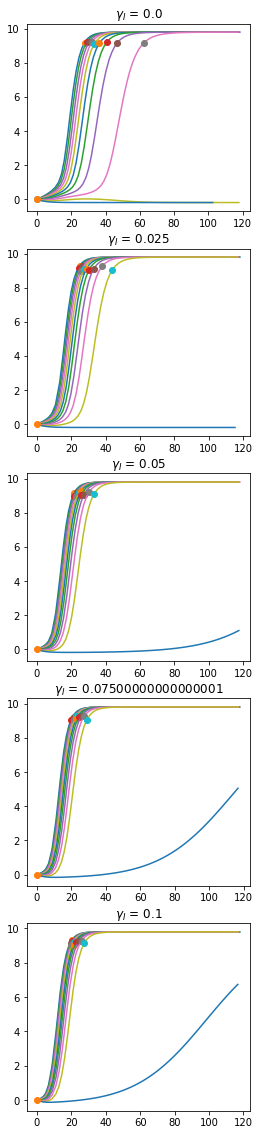

In [ ]:

settling_time = np.zeros((len(gammas),len(scenarios)))
fig, ax = plt.subplots(len(gammas),1,figsize=(4,20))
for j in range(len(gammas)):
    for i in range(len(scenarios)):
        ind = np.where(data[j][i].t <= 120)[0][-1]
        biomass = data[j][i].y[:-1, :ind].sum(axis=0).T
        revenue = biomass - 0.2
        settling = np.argmax(revenue >= 0.9*K)
        settling_time[j][i] =  settling
        ax[j].plot(data[j][i].t[:ind], revenue, label=data[j][i]['s'][0])
        ax[j].plot(data[j][i].t[settling], revenue[settling],'o')
        ax[j].set_title(f'$\gamma_I$ = {gammas[j]}')
plt.show()


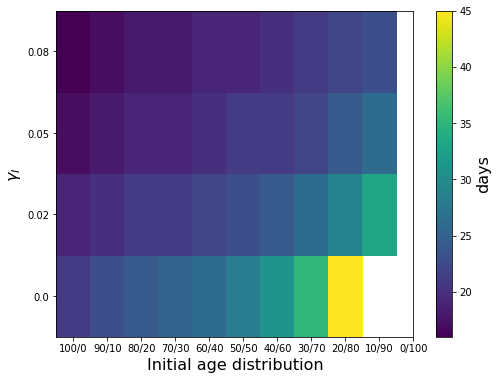

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
settling_time[settling_time == 0] = np.nan
hmap = ax.pcolor(settling_time, shading='auto')
cbar = plt.colorbar(hmap)
ax.set_ylim([0,4])
ax.set_xlim([0,10])
cbar.set_label('days',fontsize=16)#, rotation=270)
plt.xticks(ticks=np.arange(11)+0.5,labels=scenarios.keys())
plt.yticks(ticks=np.arange(len(gammas[:-1]))+0.5,labels=np.round(gammas[:-1],2))
plt.xlabel(r'Initial age distribution',fontsize=16)
plt.ylabel(r'$\gamma_I$',fontsize=16);


In [ ]:
import pickle

with open('figure3b.p','wb') as f:
    pickle.dump(gammas, f)
    pickle.dump(data, f)
    pickle.dump(settling_time, f)